# Visualising Filters

Inspired by [Chollet](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb)

In [1]:
from keras.applications import VGG16
model = VGG16(weights="imagenet",
              include_top = False)
from keras import backend as K

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [3]:
layer_name = 'block3_conv1'
filter_index = 0

In [4]:
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [5]:
grads = K.gradients(loss, model.input)[0]

In [6]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [7]:
iterate = K.function([model.input], [loss, grads])

In [8]:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 128, 128, 3))])

In [9]:
input_img_data = np.random.random((1, 128, 128, 3)) * 20 + 128.

In [10]:
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    
    input_img_data += grads_value * step

In [11]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [12]:
def generate_pattern(layer_name, filter_index, size=128):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

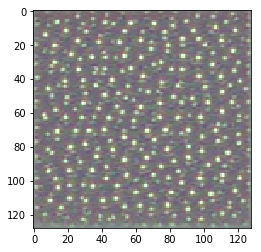

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(generate_pattern('block3_conv1', 0))

In [14]:
layer_name = 'block1_conv1'
size=64
margin=5

In [15]:
results = np.zeros((8 * size + 7 * margin,
                    8 * size + 7 * margin, 3))

In [16]:
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start : horizontal_end,
                vertical_start : vertical_end, :] = filter_img

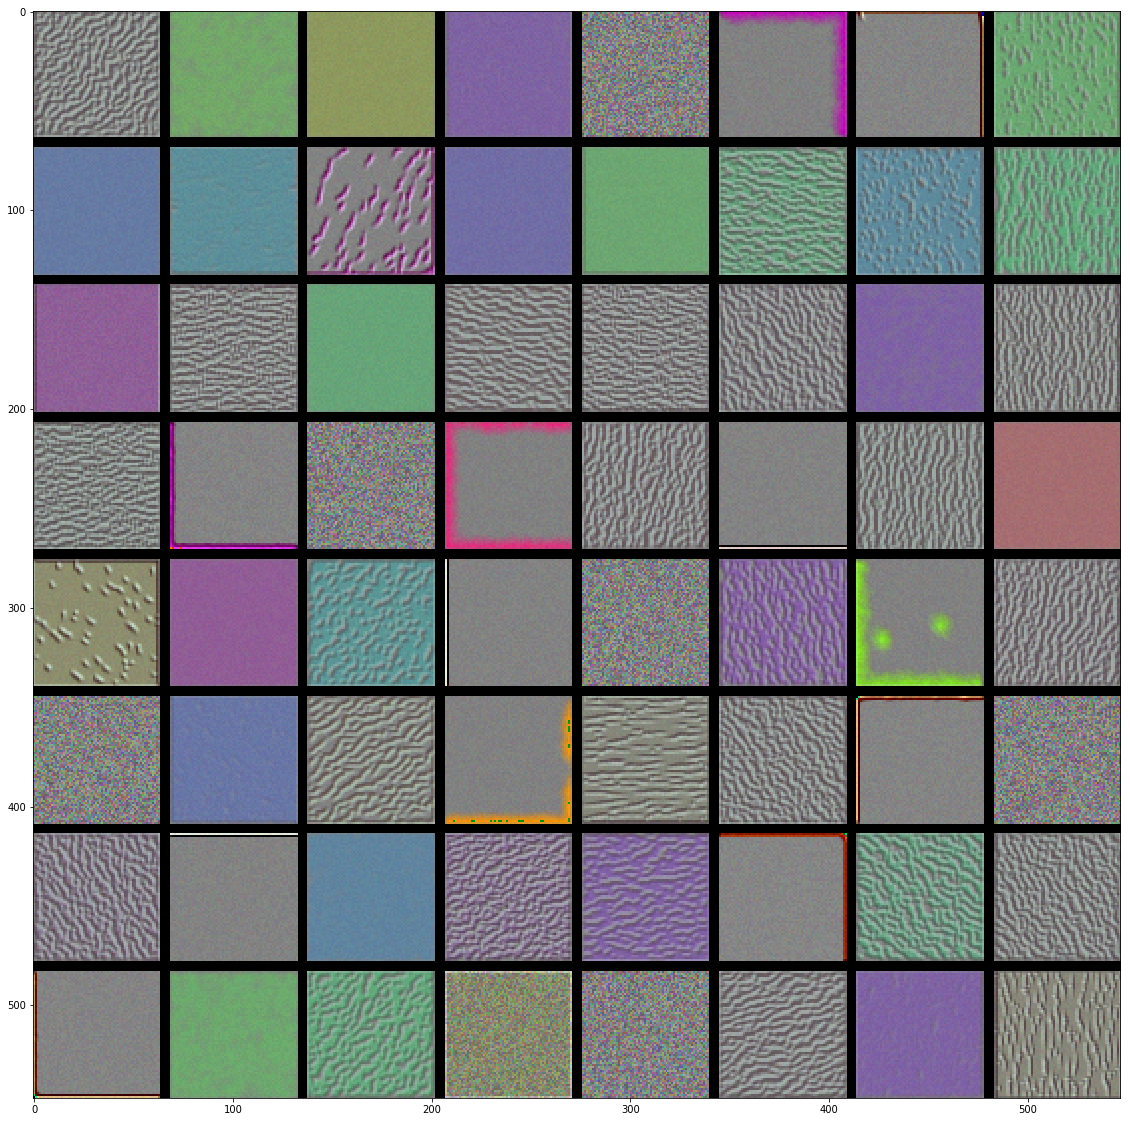

In [17]:
plt.figure(figsize=(20, 20))
plt.imshow(results);

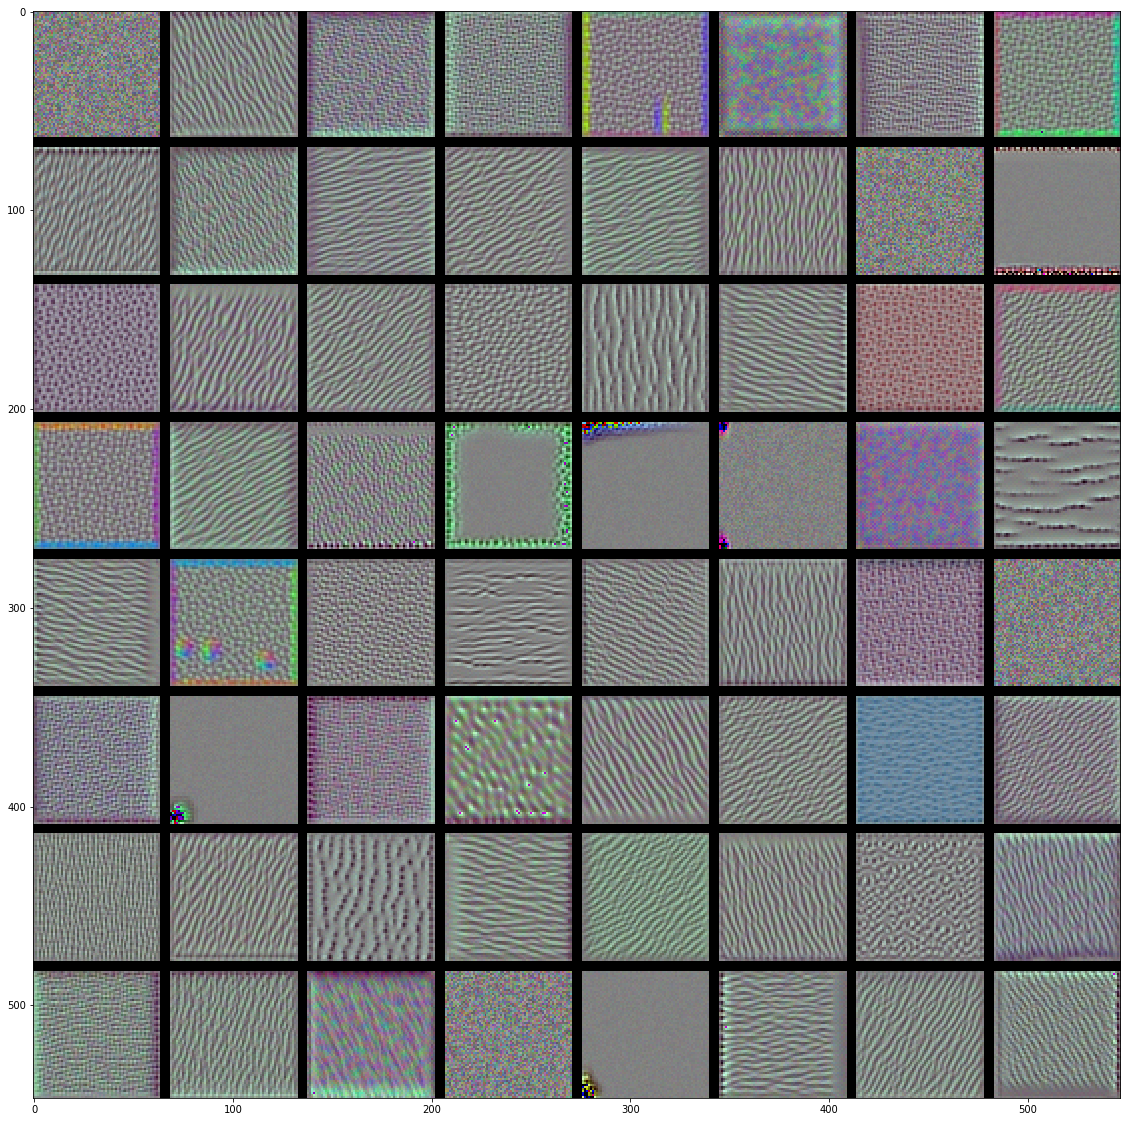

In [18]:
layer_name = 'block2_conv1'
size=64
margin=5
results = np.zeros((8 * size + 7 * margin,
                    8 * size + 7 * margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start : horizontal_end,
                vertical_start : vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results);        

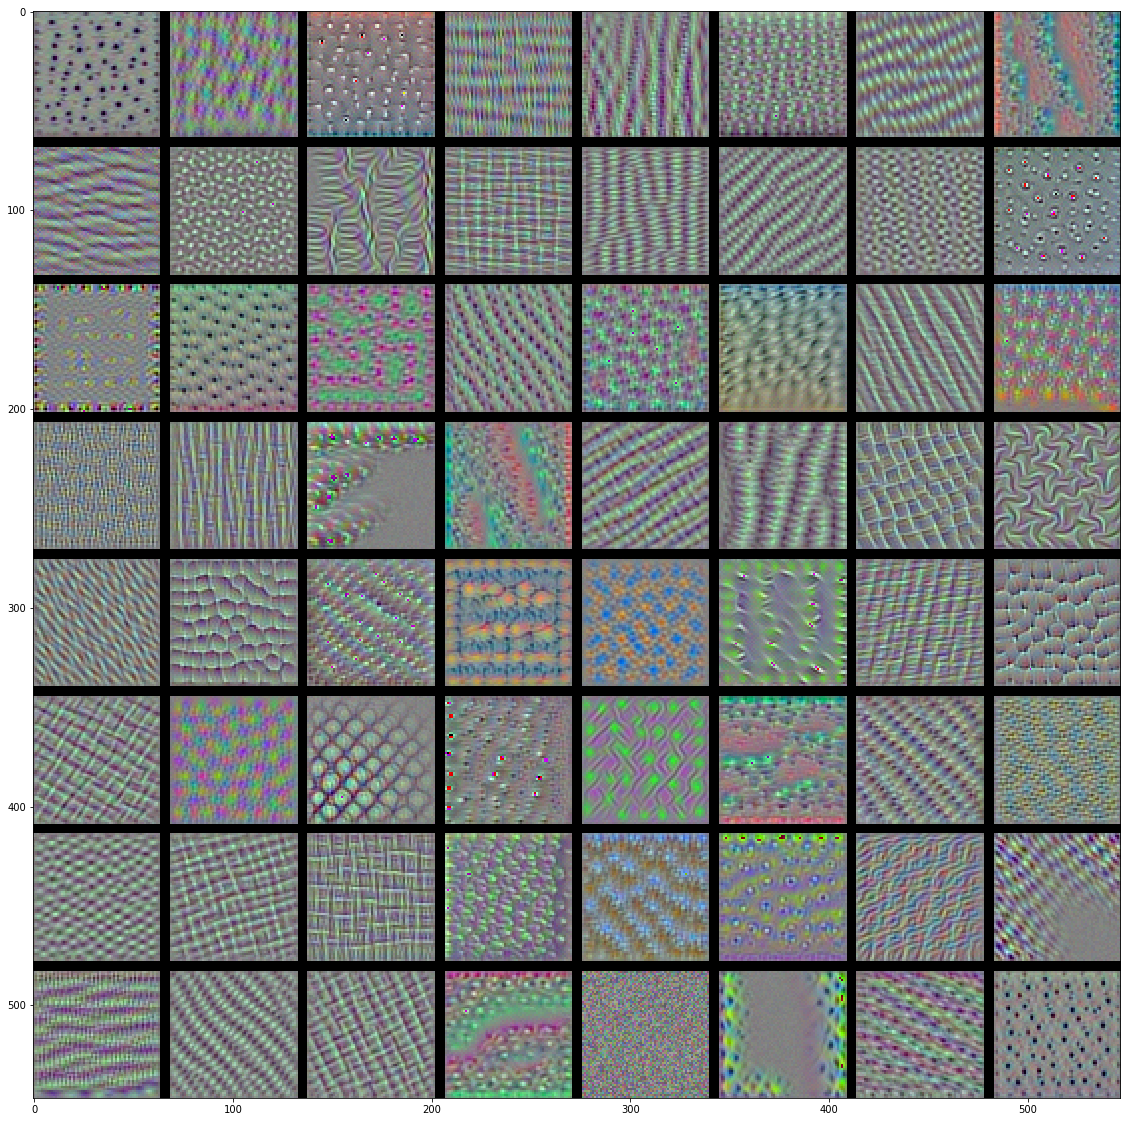

In [19]:
layer_name = 'block3_conv1'
size=64
margin=5
results = np.zeros((8 * size + 7 * margin,
                    8 * size + 7 * margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start : horizontal_end,
                vertical_start : vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results);        

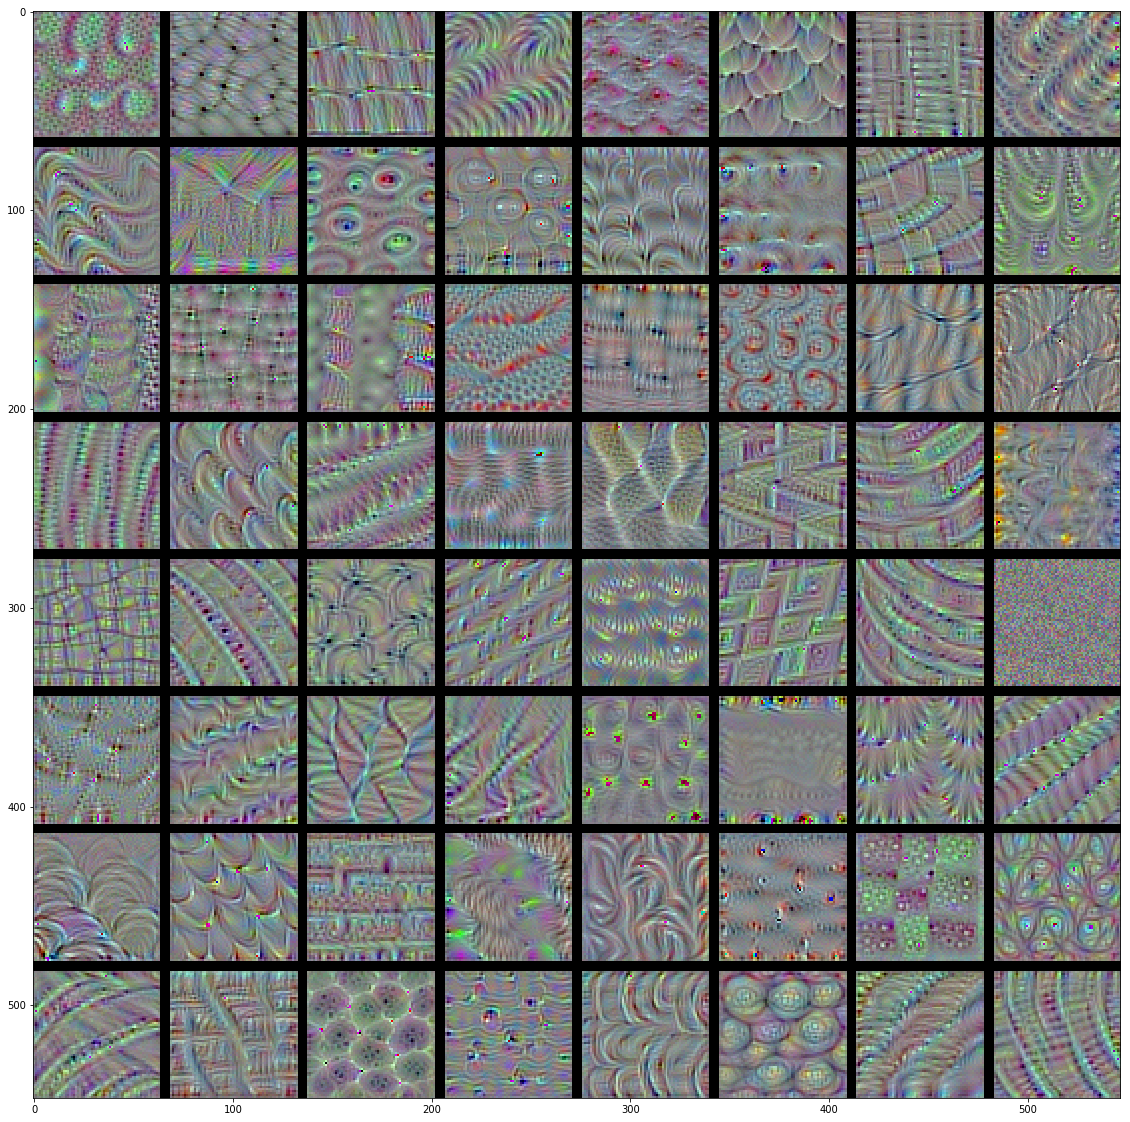

In [20]:
layer_name = 'block4_conv1'
size=64
margin=5
results = np.zeros((8 * size + 7 * margin,
                    8 * size + 7 * margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start : horizontal_end,
                vertical_start : vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results);        

***

***